## Original Idea: Predicting Vulnerable Census Tracts 

In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix,\
classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [5]:
census_df = pd.read_csv('data/NewYork.csv')

From reading the data dictionary, I know that all the columns beginning in E are the actual estimates and all the columns that begin with M are the margins of error for proceeding estimate. For this analysis, we will not need the margins of error so all of these columns can be dropped. 

In [6]:
census_df.columns.values

array(['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION',
       'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_HU', 'M_HU', 'E_HH',
       'M_HH', 'E_POV150', 'M_POV150', 'E_UNEMP', 'M_UNEMP', 'E_HBURD',
       'M_HBURD', 'E_NOHSDP', 'M_NOHSDP', 'E_UNINSUR', 'M_UNINSUR',
       'E_AGE65', 'M_AGE65', 'E_AGE17', 'M_AGE17', 'E_DISABL', 'M_DISABL',
       'E_SNGPNT', 'M_SNGPNT', 'E_LIMENG', 'M_LIMENG', 'E_MINRTY',
       'M_MINRTY', 'E_MUNIT', 'M_MUNIT', 'E_MOBILE', 'M_MOBILE',
       'E_CROWD', 'M_CROWD', 'E_NOVEH', 'M_NOVEH', 'E_GROUPQ', 'M_GROUPQ',
       'EP_POV150', 'MP_POV150', 'EP_UNEMP', 'MP_UNEMP', 'EP_HBURD',
       'MP_HBURD', 'EP_NOHSDP', 'MP_NOHSDP', 'EP_UNINSUR', 'MP_UNINSUR',
       'EP_AGE65', 'MP_AGE65', 'EP_AGE17', 'MP_AGE17', 'EP_DISABL',
       'MP_DISABL', 'EP_SNGPNT', 'MP_SNGPNT', 'EP_LIMENG', 'MP_LIMENG',
       'EP_MINRTY', 'MP_MINRTY', 'EP_MUNIT', 'MP_MUNIT', 'EP_MOBILE',
       'MP_MOBILE', 'EP_CROWD', 'MP_CROWD', 'EP_NOVEH', 'MP_NOVEH',
       'EP_GROUPQ

In [7]:
#get rid of the margin of error columns, the percentage columns, flag columns, theme sum columns and redundant
#race columns that are a part of minority 
census_df = census_df.filter(regex='^(?!M)')
census_df = census_df.filter(regex='^(?!EP)')
census_df = census_df.filter(regex='^(?!SP)')
census_df = census_df.filter(regex='^(?!F)')
census_df.drop(columns = ['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'E_DAYPOP', 'E_AFAM', 'E_HISP', 'E_ASIAN', 'E_AIAN', 'E_NHPI',
       'E_TWOMORE', 'E_OTHERRACE'], inplace = True)
census_df.drop(columns = ['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'LOCATION'], inplace = True)

In [8]:
census_df.rename({'RPL_THEMES': 'SVI_Rank'}, inplace = True, axis =1)

In [9]:
census_df.columns

Index(['COUNTY', 'AREA_SQMI', 'E_TOTPOP', 'E_HU', 'E_HH', 'E_POV150',
       'E_UNEMP', 'E_HBURD', 'E_NOHSDP', 'E_UNINSUR', 'E_AGE65', 'E_AGE17',
       'E_DISABL', 'E_SNGPNT', 'E_LIMENG', 'E_MINRTY', 'E_MUNIT', 'E_MOBILE',
       'E_CROWD', 'E_NOVEH', 'E_GROUPQ', 'SVI_Rank', 'E_NOINT'],
      dtype='object')

In [7]:
# # create target variable
# census_df['target'] = census_df['SVI_Rank'].apply(lambda x: 0 if x < census_df['SVI_Rank'].quantile(.25) 
#             else 1 if x >= census_df['SVI_Rank'].quantile(.25) and x < census_df['SVI_Rank'].quantile(.50)
#             else 2 if x >= census_df['SVI_Rank'].quantile(.50) and x < census_df['SVI_Rank'].quantile(.75) 
#             else 3)




/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: 

0.43466172381835033

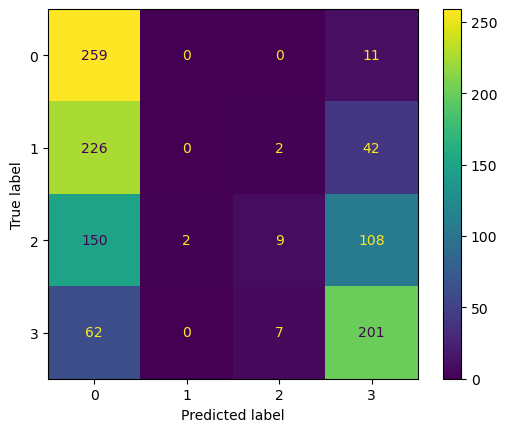

In [17]:
# # create baseline logistic regression to see if the target is in the dat

# X = census_df.drop(columns = ['SVI_Rank', 'target'])
# y = census_df['target']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)

# lr = LogisticRegression(random_state = 42, max_iter = 500, penalty = 'none')
# lr.fit(X_train, y_train)

# from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix

# plot_confusion_matrix(lr, X_test_scaled, y_test)
# lr.score(X_test_scaled, y_test)


Unfortunately, classifying social vulnerability is not going to work becuase there is not target variable included in the dataset.

## New Idea!!!!!

Using county level COVID-19 data from the CDC, I am going to attempt to merge community COVID-19 levels onto the SVI to try to see if there is a predictive relationship between social vulnerability and COVID-19

In [10]:
covid_df = pd.read_csv('data/United_States_COVID-19_Community_Levels_by_County.csv')

In [11]:
#isolate NY counties
ny_covid_df = covid_df[covid_df['state'] == 'New York']

In [12]:
#dataset includes assessments for each county at multiple different points in time. The SVI data is dated 
# from 2020 so I will use the earliest date to align as best as possible  
ny_covid_df['date_updated'].sort_values(ascending=True)
ny_covid_df = ny_covid_df[ny_covid_df['date_updated'] == '2022-02-24' ]
ny_county_covid = ny_covid_df[['county', 'covid-19_community_level']]
ny_county_covid['county'] = ny_county_covid['county'].str.split().str[0]
ny_county_covid['county'].replace(['New', 'St.'], ['New York', 'St. Lawrence'], inplace = True)
ny_county_covid.rename(columns = {'county': 'COUNTY'}, inplace = True)

# ny_county_covid.set_index('county', drop = True, inplace = True)
# county_covid_dict = ny_county_covid.to_dict()['covid-19_community_level']
# county_covid_dict

/var/folders/bz/wt88kdhn16b5hb19ht43l3pw0000gn/T/ipykernel_7689/3574082715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_county_covid['county'] = ny_county_covid['county'].str.split().str[0]
/var/folders/bz/wt88kdhn16b5hb19ht43l3pw0000gn/T/ipykernel_7689/3574082715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_county_covid['county'].replace(['New', 'St.'], ['New York', 'St. Lawrence'], inplace = True)
/var/folders/bz/wt88kdhn16b5hb19ht43l3pw0000gn/T/ipykernel_7689/3574082715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [13]:
#Merge the covid data onto the census data

joint_df = census_df.merge(ny_county_covid, how = 'left', on = 'COUNTY')
joint_df = joint_df.rename(columns = {'covid-19_community_level': 'target'})
joint_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 0 to 5393
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTY     5394 non-null   object 
 1   AREA_SQMI  5394 non-null   float64
 2   E_TOTPOP   5394 non-null   int64  
 3   E_HU       5394 non-null   int64  
 4   E_HH       5394 non-null   int64  
 5   E_POV150   5394 non-null   int64  
 6   E_UNEMP    5394 non-null   int64  
 7   E_HBURD    5394 non-null   int64  
 8   E_NOHSDP   5394 non-null   int64  
 9   E_UNINSUR  5394 non-null   int64  
 10  E_AGE65    5394 non-null   int64  
 11  E_AGE17    5394 non-null   int64  
 12  E_DISABL   5394 non-null   int64  
 13  E_SNGPNT   5394 non-null   int64  
 14  E_LIMENG   5394 non-null   int64  
 15  E_MINRTY   5394 non-null   int64  
 16  E_MUNIT    5394 non-null   int64  
 17  E_MOBILE   5394 non-null   int64  
 18  E_CROWD    5394 non-null   int64  
 19  E_NOVEH    5394 non-null   int64  
 20  E_GROUPQ

In [14]:
joint_df = joint_df.drop(columns = ['SVI_Rank', 'COUNTY'])
joint_df['target'].value_counts()

Low       4037
Medium    1068
High       289
Name: target, dtype: int64

In [15]:
modeless_accuracy = (4037/(4037+1068+289))*100
print('The accuracy for a modeless classifier would be: {}%'.format(modeless_accuracy))

The accuracy for a modeless classifier would be: 74.84241750092696%


## EDA

From the data dictionary associated with the SVI census data, I know that missing values in the data are marked with a value of 999. I will find and replace them with NaN so they can be imputed as part of the pipeline later on.

In [16]:
joint_df.replace(999, np.nan, inplace = True )
joint_df['target'] = joint_df['target'].map({'Low':0, 'Medium': 1, 'High': 2})


In [17]:
joint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 0 to 5393
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AREA_SQMI  5394 non-null   float64
 1   E_TOTPOP   5394 non-null   int64  
 2   E_HU       5393 non-null   float64
 3   E_HH       5392 non-null   float64
 4   E_POV150   5392 non-null   float64
 5   E_UNEMP    5394 non-null   int64  
 6   E_HBURD    5394 non-null   int64  
 7   E_NOHSDP   5393 non-null   float64
 8   E_UNINSUR  5394 non-null   int64  
 9   E_AGE65    5392 non-null   float64
 10  E_AGE17    5392 non-null   float64
 11  E_DISABL   5394 non-null   int64  
 12  E_SNGPNT   5394 non-null   int64  
 13  E_LIMENG   5393 non-null   float64
 14  E_MINRTY   5392 non-null   float64
 15  E_MUNIT    5392 non-null   float64
 16  E_MOBILE   5394 non-null   int64  
 17  E_CROWD    5394 non-null   int64  
 18  E_NOVEH    5392 non-null   float64
 19  E_GROUPQ   5394 non-null   int64  
 20  E_NOINT 

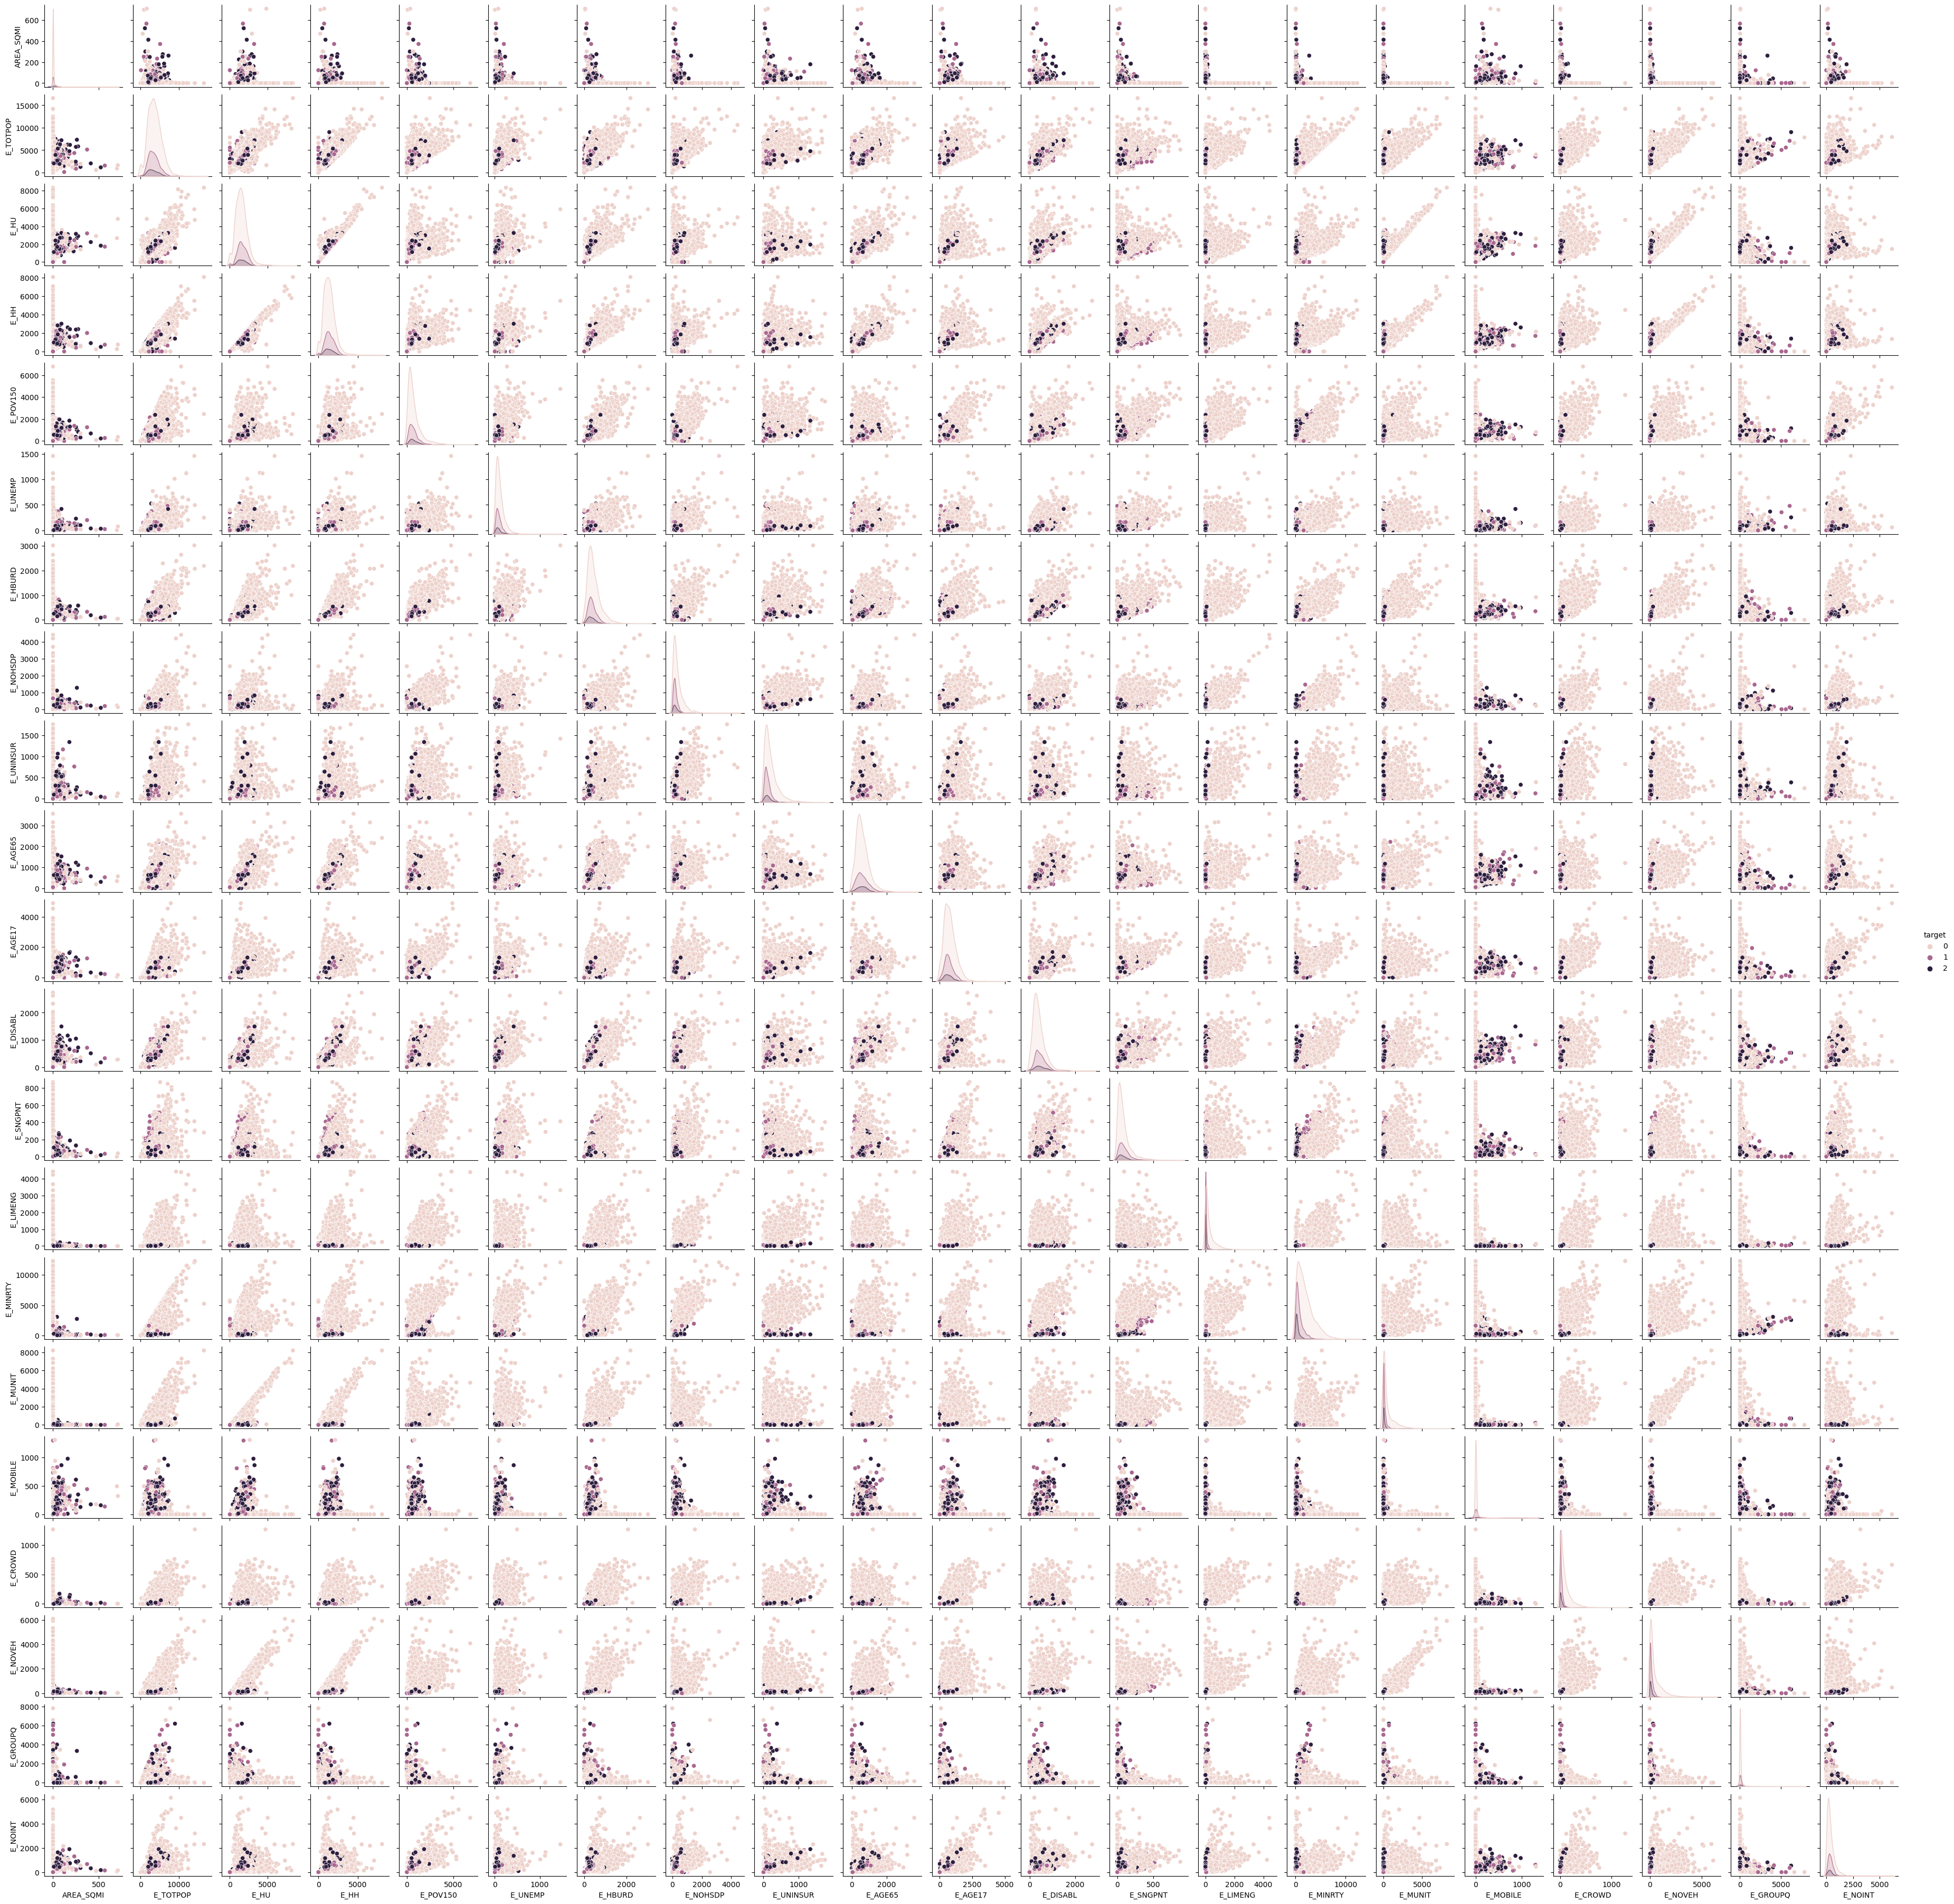

In [18]:
sns.pairplot(hue = 'target', data = joint_df, height = 1.75)

Almost all of the independent variables are multi-colinear which makes sense because they are all population estimates. Use of regularization is going to be important here. The target population is not normally distributed, so if I want to use any Bayesian models it will require a transformation. 

## Train-Test Split

In [20]:
X = joint_df.drop(columns = 'target')
y = joint_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .25, random_state = 42) 

## Baseline Model - Standard Logistic Regression 

In [38]:
#set up pipeline
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('lr', LogisticRegression(solver = 'saga', random_state=42))]

model_pipe = Pipeline(steps)
model_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

In [39]:
#create custom cross validation function for future use 

def cross_validation(X_train, y_train, estimator, num_split = 5):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
        
        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        estimator.fit(X_train_fold, y_train_fold)
        
        # now how did we do?
        accuracy_train = estimator.score(X_train_fold, y_train_fold)
        accuracy_val = estimator.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'train': 0.822682323856613, 'validation': 0.8173053152039556}
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3027
           1       0.62      0.58      0.60       801
           2       0.50      0.08      0.14       217

    accuracy                           0.82      4045
   macro avg       0.66      0.53      0.55      4045
weighted avg       0.80      0.82      0.80      4045



/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


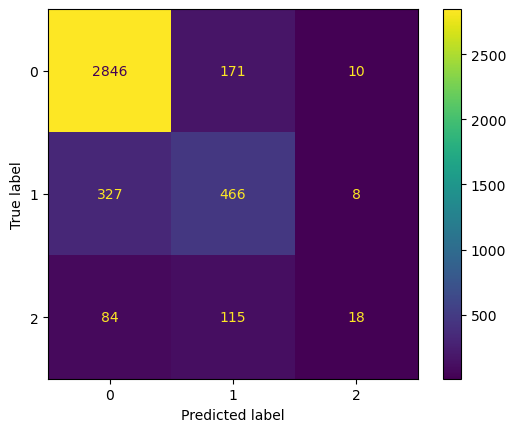

In [44]:
#assess baseline performance 

print(cross_validation(X_train, y_train, model_pipe))
plot_confusion_matrix(model_pipe, X_train, y_train)
y_pred = model_pipe.predict(X_train)
print(classification_report(y_train, y_pred))

### Observations

* Train and validation accuracy are very close together so we know that the model is not overfitting
* High accuracy score is misleading as the model is not very accurate in predicting classes 1 and 2
* Imbalance for class 2 in the dataset is an issue, will need to use some sort of oversampling technique
* Model was not able to converge on the error minimizing point. Need to adjust hyperparameters 


## Model 2: Logistic Regression with SMOTE  

In [41]:
steps_2 = [('imputer', SimpleImputer(strategy="median")),
           ('sampler', SMOTE(sampling_strategy = 'not majority', random_state =42)),
           ('std_scaler', StandardScaler()),
        ('lr', LogisticRegression(solver = 'saga', random_state=42))]

sm_model = Pipeline(steps_2)
sm_model

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('sampler',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('std_scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'train': 0.8045735475896167, 'validation': 0.7972805933250926}
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3027
           1       0.66      0.67      0.67       801
           2       0.26      0.69      0.38       217

    accuracy                           0.81      4045
   macro avg       0.63      0.74      0.65      4045
weighted avg       0.87      0.81      0.83      4045



/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


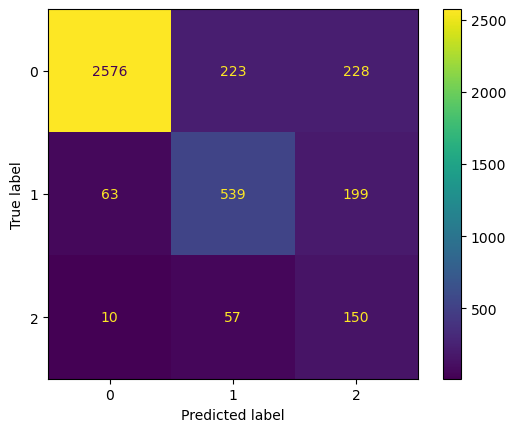

In [45]:
#assess model_2 performance 

print(cross_validation(X_train, y_train, sm_model))
plot_confusion_matrix(sm_model, X_train, y_train)
y_pred = sm_model.predict(X_train)
print(classification_report(y_train, y_pred))

### Observations

* Lose a bit of accuracy on the train and validation scores, but the model more accurately predicts the non-majority class. f1 score and recall improved significantly for all classes  
* Tuning the hyperparameters to allow the model to actually converge could help improve the scores and accuracy 

## Model 3: Logistic Regression with SMOTE and GridSearch 

In [ ]:
LogisticRegression()

In [60]:
c_values = [10 ** i for i in range(-3, 4)]
tol_values = [1, 1e-1, 1e-2, 1e-3, 1e-4]

params = {'lr__penalty': ['l1', 'l2'],
          'lr__C': c_values,
         'lr__max_iter': [100, 1000, 5000, 10000, 15000],
         'lr__tol': tol_values}

cv = GridSearchCV(estimator = sm_model, param_grid = params, cv = 5, n_jobs = -1)
cv.fit(X_train, y_train)
best_sm_model = cv.best_estimator_

/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/s

/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/s

/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/s

In [69]:
print(best_sm_model.score(X_train, y_train))
best_sm_model

0.8022249690976514


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('sampler',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('std_scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

### Observations 

* The resulting model is slightly less accurate than the original SMOTE model. Will move on to try different modeling techniques 

## Model 4: Decision Tree

In [85]:
steps_4 = [('imputer', SimpleImputer(strategy="median")),
        ('dt', DecisionTreeClassifier(max_depth = 10, random_state = 42))]

dt_model = Pipeline(steps_4)

{'train': 0.9127317676143388, 'validation': 0.7621755253399258}
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3027
           1       0.74      0.80      0.77       801
           2       0.75      0.39      0.51       217

    accuracy                           0.89      4045
   macro avg       0.81      0.71      0.74      4045
weighted avg       0.88      0.89      0.88      4045



/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/qoya/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


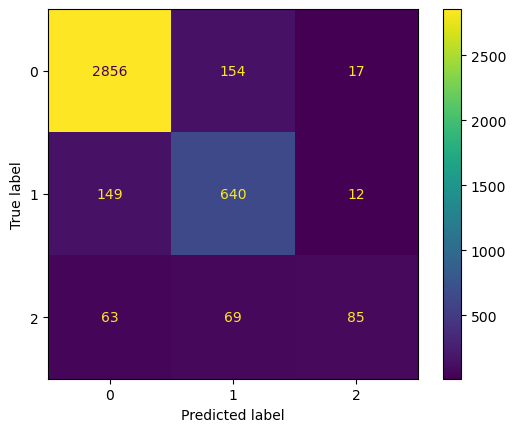

In [86]:
print(cross_validation(X_train, y_train, dt_model))
plot_confusion_matrix(dt_model, X_train, y_train)
y_pred = dt_model.predict(X_train)
print(classification_report(y_train, y_pred))

### Observations

* highest training score yet, but it is clearly overfitting 
* next step: tune the hyperparameters to improve validation score 

## Model 5: Tuned Decision Tree

In [ ]:
DecisionTreeClassifier()

In [91]:
max_depth_values = range(2,11)
min_sample_leaf_values = range(2,6)
max_feature_values = range(2,22)
criterion_values = ['gini', 'entropy']
splitter_values = ['best', 'random']
class_weight_values = ['balanced', None]

params = {'dt__max_depth': max_depth_values,
           'dt__min_samples_leaf': min_sample_leaf_values,
          'dt__max_features': max_feature_values,
          'dt__criterion': criterion_values,
         'dt__splitter': splitter_values,
         'dt__class_weight': class_weight_values}

dt_cv = GridSearchCV(estimator = dt_model, param_grid = params, cv = 5, n_jobs = -1)
dt_cv.fit(X_train, y_train)
best_dt_model = dt_cv.best_estimator_

In [96]:
best_dt_model

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('dt',
                 DecisionTreeClassifier(max_depth=8, max_features=7,
                                        min_samples_leaf=2, random_state=42))])

In [93]:
print(cross_validation(X_train, y_train, best_dt_model))

{'train': 0.8559950556242274, 'validation': 0.7604449938195303}


### Observations
* improvement over the baseline and logistic regression train scores, but is still overfitted. 
* reasonable next step would be to try random forest and XGBoost to try to further improve performance while reducing overfitting 

## Random Forest

In [110]:
rf_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=150, random_state = 42))])

rf_model


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(n_estimators=150, random_state=42))])

In [105]:
print(cross_validation(X_train, y_train, rf_model))

{'train': 1.0, 'validation': 0.8074165636588381}


RF model is still very overfitted, but improved the validation score over the decision tree and is only second to the baseline logistic model 

## Tuned Random Forest

In [111]:

params = {'rf__n_estimators': [10, 50, 100, 200, 500],
          'rf__max_depth': [5, 10, 20, None],
          'rf__min_samples_split': [2, 5, 10],
          'rf__min_samples_leaf': [1, 2, 4],
          'rf__max_features': ['auto', 'sqrt', 'log2', None]}

rf_cv = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1)
rf_cv.fit(X_train, y_train)
best_rf_model = rf_cv.best_estimator_

In [113]:
best_rf_model

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_features=None, random_state=42))])

In [115]:
print(cross_validation(X_train, y_train, best_rf_model))

{'train': 1.0, 'validation': 0.8133498145859084}
